In [1]:
import os
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time
import multiprocessing

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate


import scipy as sp
from scipy import stats
from mca import *


%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML

import plotly
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.graph_objs import *
# tls.set_credentials_file(username='darshan.bhansali', api_key='38zZ2TS4ob4feqV0bvR0')
tls.set_credentials_file(username='darshan-b', api_key='KuC894mmVN7kBiZZyffO')
# tls.set_credentials_file(username='darshan18', api_key='dhwPNrhtYUy2iMbQqALn')

In [2]:
column_names_threat=['Recorded_Time','Received_Time','Serial_Number','Type','Subtype', 'Config_Version','Generated_Time',
                     'Source_IP','Destination_IP','NAT_Source_IP','NAT_Destination_IP','Rule_Name','Source_User','Destination_User',
                     'Application','Virtual_System','Source_Zone','Destination_Zone','Ingress_Interface','Egress_Interface', 
                     'Log_Forwarding_Profile','Future_Use','Session_ID','Repeat_Count','Source_Port','Destination_Port', 
                     'NAT_Source_Port','NAT_Destination_Port','Flags','Protocol','Action', 'Miscellaneous','Threat_ID', 
                     'Category', 'Severity', 'Direction','Sequence_Number', 'Action_Flags','Source_Location','Destination_Location',
                     'Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Something','Drop_46','Drop_47','Drop_48','Drop_49',
                     'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                     'device_name','Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_66','Drop_67','Drop_68',
                     'Detailed_Subtype','Something_2','From_Policy']

In [3]:
def read_logs(rel_path,compression=None,extension=None,column_names=None):
    path = rel_path
    zip_files = [f for f in os.listdir(path) if f.endswith(extension)]
    paths = [path + x for x in zip_files]
    df=pd.DataFrame()
    for i in range(0,len(paths)):
        try:
            demo_df=pd.read_csv(paths[i],header=None,infer_datetime_format=True,low_memory=True,
                                compression=compression,error_bad_lines=False,warn_bad_lines=False,memory_map=True)
        except:
#             print(i,paths[i],"\n")
            continue
        if demo_df.empty!=True:
            df=df.append(demo_df)
        else:
            print("Not empty")
    df.columns=column_names
    return df

In [4]:
root_paths=['../../data/2017-09-26/','../../data/2017-09-27/','../../data/2017-09-28/','../../data/2017-09-29/',
            '../../data/2017-09-30/','../../data/2017-10-01/','../../data/2017-10-02/','../../data/2017-10-03/',
            '../../data/2017-10-04/','../../data/2017-10-05/','../../data/2017-10-06/','../../data/2017-10-07/',
            '../../data/2017-10-08/','../../data/2017-10-09/','../../data/2017-10-10/','../../data/2017-10-11/'
           ,'../../data/2017-10-12/','../../data/2017-10-13/','../../data/2017-10-14/','../../data/2017-10-15/'
           ,'../../data/2017-10-16/','../../data/2017-10-17/','../../data/2017-10-18/','../../data/2017-10-19/'
           ,'../../data/2017-10-20/','../../data/2017-10-21/','../../data/2017-10-22/','../../data/2017-10-23/'
            ,'../../data/2017-10-24/','../../data/2017-10-25/','../../data/2017-10-26/']

threat_logs=pd.DataFrame()
for i in range(0,len(root_paths)):
    df2=(read_logs(root_paths[i],None,'Wireless-PA.csv',column_names_threat))
    threat_logs=pd.concat([threat_logs,df2])
threat_logs.Received_Time=pd.to_datetime(threat_logs.Received_Time)
threat_logs.sort_values(by='Received_Time',inplace=True)
threat_logs.dropna(inplace=True,subset=['Source_User'])
threat_logs.reset_index(inplace=True,drop=True)

In [5]:
threat_logs.drop(['Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Drop_46','Drop_47','Drop_48','Drop_49',
                 'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                 'Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_65','Drop_66','Drop_67',
                 'Drop_68',
                 'NAT_Source_IP','NAT_Destination_IP','Rule_Name','Destination_User','Virtual_System',
                 'Log_Forwarding_Profile','NAT_Source_Port','NAT_Destination_Port','Action_Flags','From_Policy',
                 'Flags','Serial_Number','Config_Version','Source_Zone','Destination_Zone','Ingress_Interface',
                'Egress_Interface'],
                axis=1,inplace=True)

In [6]:
threat_logs.head(2)

Recorded_Time       Received_Time    Type  Subtype  \
0  Sep 26 19:59:22 ptx-pan.net.umd.edu 1 2017-09-26 19:59:22  THREAT  spyware   
1  Sep 26 20:04:27 ptx-pan.net.umd.edu 1 2017-09-26 20:04:26  THREAT  spyware   

        Generated_Time       Source_IP Destination_IP  \
0  2017/09/26 19:59:16  10.104.152.230     128.8.74.2   
1  2017/09/26 20:04:21   10.104.28.101     128.8.74.2   

                                         Source_User Application  \
0  028d66b233501fa7283c352230fe049c858c466c17501a...         dns   
1  cfc79fc322e3f76c7c52fe3dd88af9b70bc41f9a9ab1a9...         dns   

            Future_Use  Session_ID  Repeat_Count Source_Port  \
0  2017/09/26 19:59:16  34759955.0           1.0       63265   
1  2017/09/26 20:04:21  68359997.0           1.0       21322   

   Destination_Port Protocol    Action Miscellaneous  \
0              53.0      udp  sinkhole             "   
1              53.0      udp  sinkhole             "   

                                           Threat_ID Category Severity  \
0  Suspicious DNS Query (generic:rammichael.com)(...      any   medium   
1  Suspicious DNS Query (generic:global.ymtrackin...      any   medium   

          Direction  Sequence_Number      Source_Location  \
0  client-to-server      642299358.0  UMD Private Network   
1  client-to-server      642299505.0  UMD Private Network   

  Destination_Location  Something       device_name Detailed_Subtype  \
0        United States        0.0  css-wireless-pa1              dns   
1        United States        0.0  css-wireless-pa1              dns   

     Something_2  
0  AppThreat-0-0  
1  AppThreat-0-0

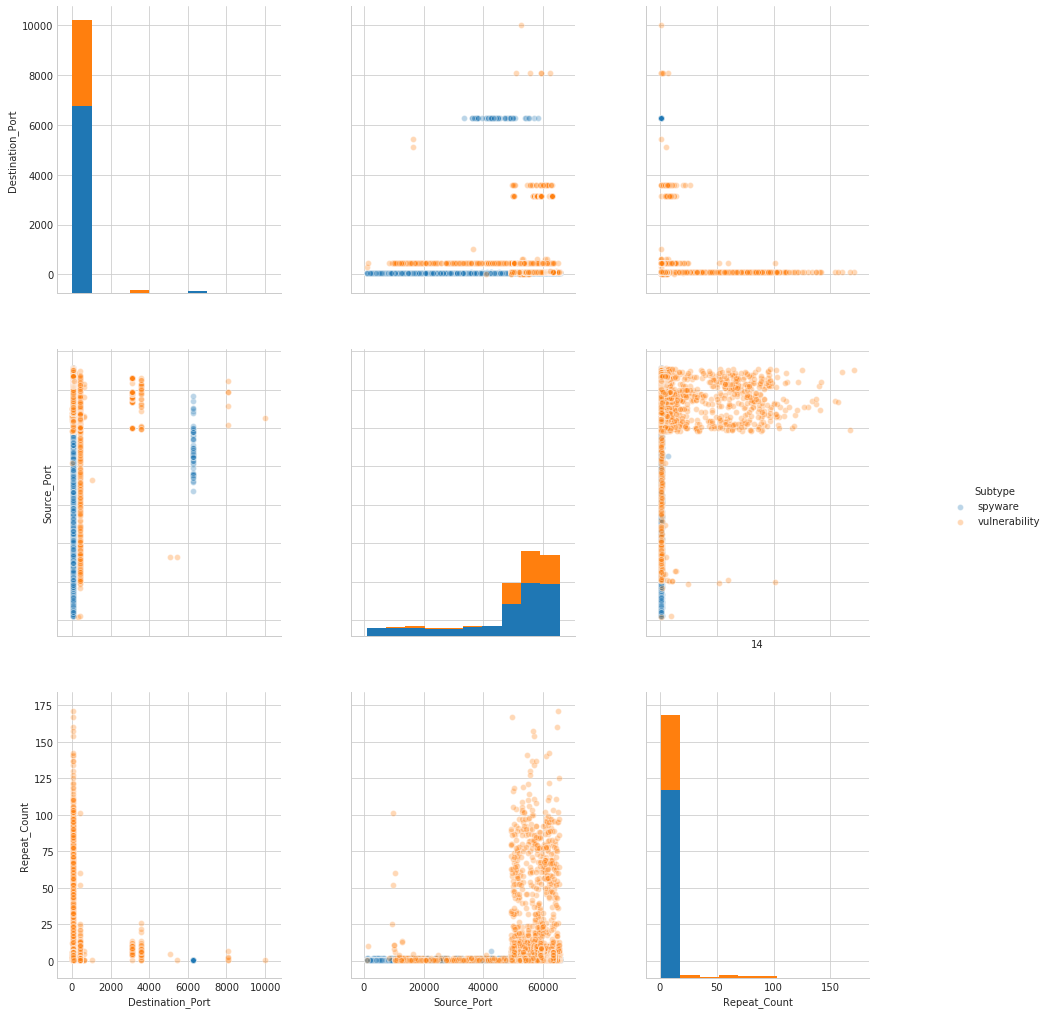

In [7]:
d=threat_logs[['Destination_Port','Source_Port','Repeat_Count','Subtype']].copy()
# d=threat_logs.copy()
d.dropna(inplace=True)
d.Destination_Port=d.Destination_Port.astype(int)
d.Source_Port=d.Source_Port.astype(int)
sns.set_style('whitegrid')
g=sns.pairplot(data=d,hue='Subtype',plot_kws={'alpha':0.3},diag_kind='hist')
g.fig.set_size_inches(15,15)
i=0
for ax in g.axes.flat: 
    if(i in [0,6,12,18,30]):
        plt.setp(ax.yaxis.get_majorticklabels(),visible=True)
    else:
        plt.setp(ax.yaxis.get_majorticklabels(),visible=False)
    if(i>=6):
        plt.setp(ax.xaxis.get_majorticklabels(),visible=True)
    else:
        plt.setp(ax.xaxis.get_majorticklabels(),visible=False)
    i=i+1
plt.xlabel(s=14)
plt.show()

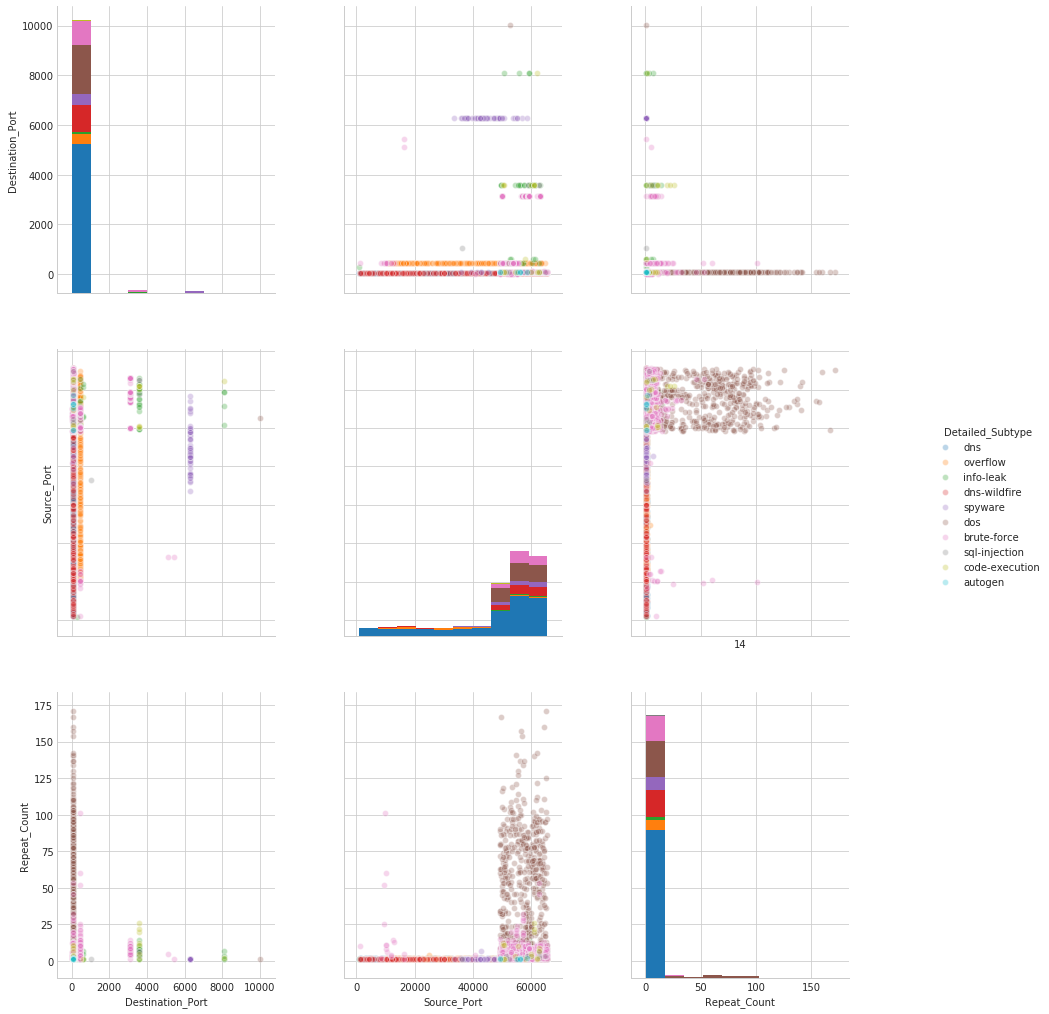

In [8]:
d=threat_logs[['Destination_Port','Source_Port','Repeat_Count','Detailed_Subtype']].copy()
d.dropna(inplace=True)
d.Destination_Port=d.Destination_Port.astype(int)
d.Source_Port=d.Source_Port.astype(int)
sns.set_style('whitegrid')
g=sns.pairplot(data=d,hue='Detailed_Subtype',plot_kws={'alpha':0.3},diag_kind='hist')
g.fig.set_size_inches(15,15)
i=0
for ax in g.axes.flat: 
    if(i in [0,6,12,18,30]):
        plt.setp(ax.yaxis.get_majorticklabels(),visible=True)
    else:
        plt.setp(ax.yaxis.get_majorticklabels(),visible=False)
    if(i>=6):
        plt.setp(ax.xaxis.get_majorticklabels(),visible=True)
    else:
        plt.setp(ax.xaxis.get_majorticklabels(),visible=False)
    i=i+1
plt.xlabel(s=14)
plt.show()

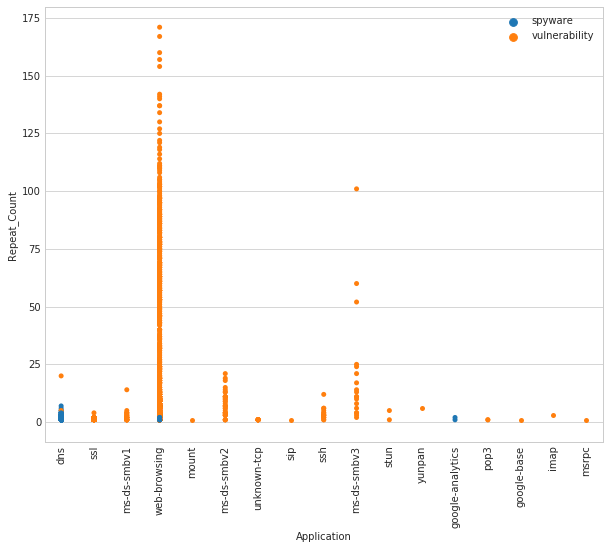

In [9]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Application',y='Repeat_Count',data=threat_logs,hue='Subtype')
plt.xticks(rotation=90)
plt.legend()
plt.show()

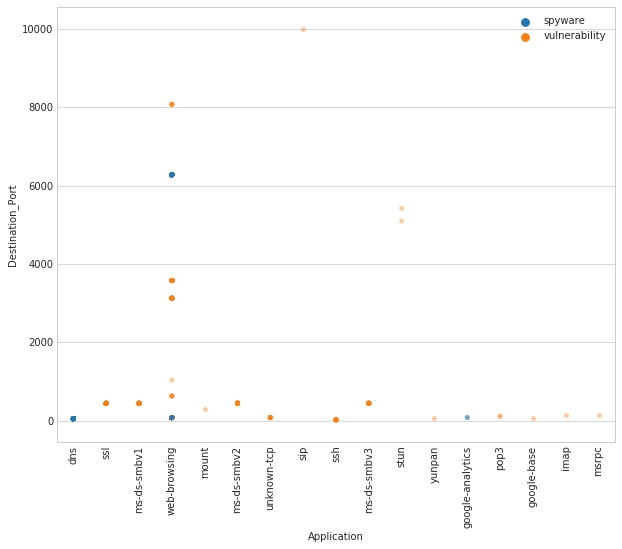

In [10]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Application',y='Destination_Port',data=threat_logs,hue='Subtype',alpha=0.4)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [11]:
d=threat_logs.groupby(threat_logs.Source_User).agg({'Application':lambda x: x.nunique(),
                                                  'Source_User':lambda x: x.value_counts(),
                                                    'Subtype':lambda x: x.unique()[0],
                                                   'Destination_Port':lambda x: x.nunique(),
                                                   'Source_Port':lambda x: x.nunique()})

y=threat_logs.groupby(threat_logs.Source_User).agg({"Received_Time":
                                                    lambda x: [x.unique()]})

y.Received_Time=(y.Received_Time).apply(lambda x: (x[0][-1])-x[0][-2] if len(x[0])>2 else x[0].max()-x[0].min())
y.Received_Time=y.Received_Time.apply(lambda x:x.total_seconds())
d=d.join(y)

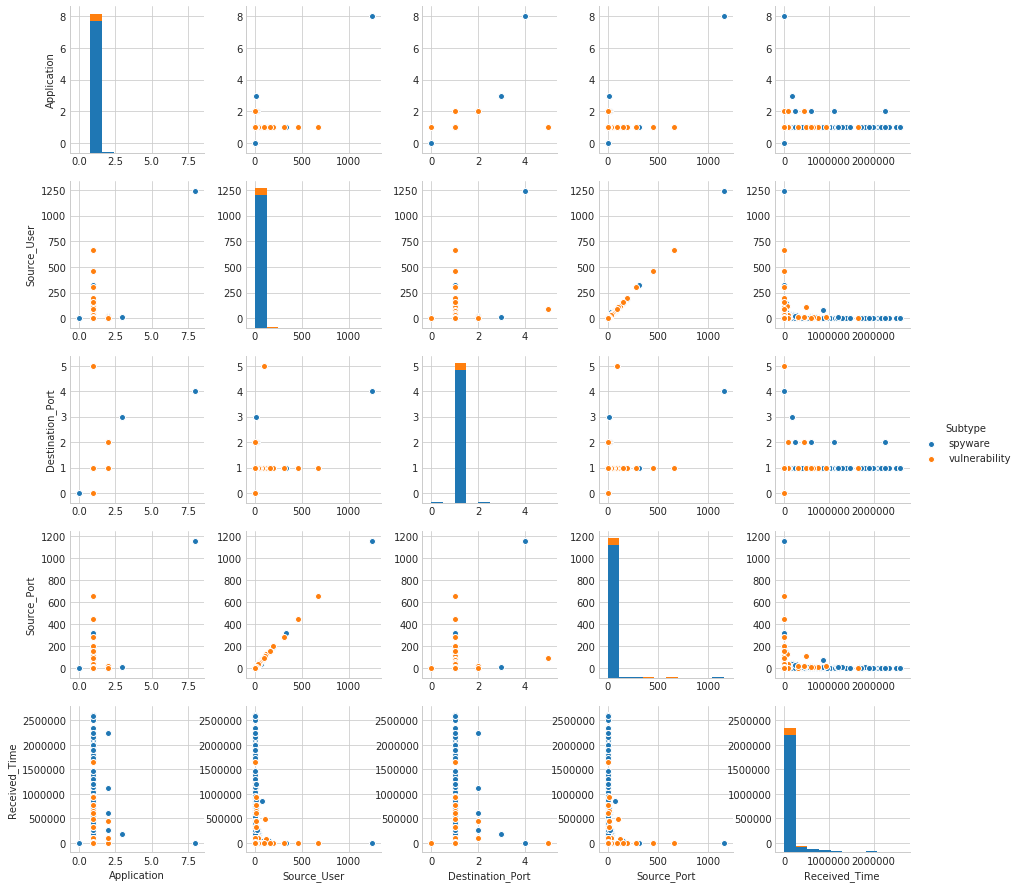

In [12]:
sns.pairplot(d,hue='Subtype')

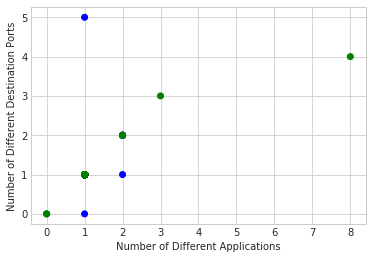

In [13]:
c=d['Subtype'].map({'spyware':'green','vulnerability':'blue'})
plt.scatter(d['Application'],d['Destination_Port'],c=c.values,marker='o',facecolors='none')
plt.ylabel('Number of Different Destination Ports')
plt.xlabel('Number of Different Applications')
plt.show()

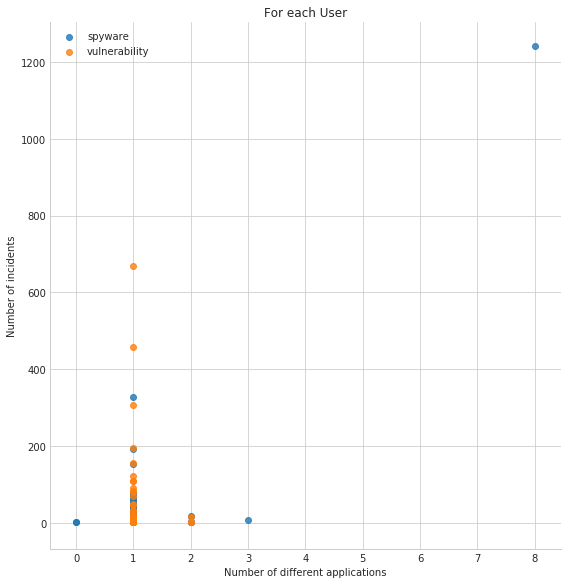

In [14]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.lmplot(x='Application',y='Source_User',data=d,fit_reg=False,hue='Subtype',legend_out=False,size=8)
plt.title("For each User")
plt.legend()
plt.xlabel("Number of different applications")
plt.ylabel('Number of incidents')
plt.show()

In [15]:
len(d)

1223

In [17]:
threat_logs.Source_User.nunique()

1223

### Preliminary Attempt

In [143]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

In [144]:
d.Received_Time=d.Received_Time*d.Source_User
X=d[['Application','Source_User','Destination_Port','Source_Port','Received_Time']]

In [145]:
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)
    
def evaluate_model(model,X,Y):
    print("Log Loss is:",log_loss(Y,model.predict_proba(X)))

def get_cm(model,X,Y):
    y_pred=model.predict(X)
    print(tabulate(confusion_matrix(Y,y_pred),tablefmt='grid',headers=['vulnerability','spyware']))

def get_classification_report(model,X,Y):
    print(classification_report(Y,model.predict(X)))
    
def grid(kernel,params,X,Y,X_test,Y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(X,Y)
    evaluate_model(grid_search,X,Y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,X,Y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(Y_test,grid_search.predict(X_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,X_test,Y_test)
    
    return grid_search    

### Scaling

In [146]:
scaled_X = StandardScaler()
X_scaled=scaled_X.fit(X)
Y=d.Subtype.apply(lambda x: 1 if x=='spyware' else 0).values
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=0)

### SVC

In [147]:
svc=SVC()
parameters = dict(C=[0.5,0.7,0.3],kernel=['linear','poly'],degree=[2,3,4],gamma=[0.01,0.03],
                  shrinking=[True,False],tol=[1e-5],max_iter=[10],random_state=[0],probability=[True]
                 )
svc_model=grid(svc,parameters,X_train,Y_train,X_test,Y_test ,"Support Vector Classifier")

Log Loss is: 15.3610871362
Best Parameters are :


0       1      2       3         4            5             6  \
index    C  degree  gamma  kernel  max_iter  probability  random_state   
0      0.3       2   0.01    poly        10         True             0   

               7      8  
index  shrinking    tol  
0           True  1e-05


Accuracy of the  Support Vector Classifier  model for training data is: 0.917121046892

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               1 |        43 |
+-----------------+-----------+
|               1 |       872 |
+-----------------+-----------+
Accuracy of the  Support Vector Classifier  model for test data is: 0.93137254902

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               0 |        21 |
+-----------------+-----------+
|               0 |       285 |
+-----------------+-----------+


### KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[5,10,20,15],weights=['uniform','distance'], algorithm=['auto','ball_tree','kd_tree','brute'],
                  leaf_size=[2,3,5,10,15,20,25,30],
                  metric=['euclidean','manhattan','chebyshev','minkowski']
                 )
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Log Loss is: 0.660091436681
Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean            5  uniform


Accuracy of the  KNN  model for training data is: 0.952017448201

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               3 |        41 |
+-----------------+-----------+
|               1 |       872 |
+-----------------+-----------+
Accuracy of the  KNN  model for test data is: 0.93137254902

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               0 |        21 |
+-----------------+-----------+
|               0 |       285 |
+-----------------+-----------+


### Logistic 

In [149]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,1,0.3],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.3],max_iter=[50,100,150],solver=['newton-cg','lbfgs','liblinear','sag'],
                  tol=[1e-5,1e-3,1e-7],multi_class=['ovr']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Log Loss is: 0.161627894128
Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5       150          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05


Accuracy of the  Logistic  model for training data is: 0.957470010905

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               7 |        37 |
+-----------------+-----------+
|               1 |       872 |
+-----------------+-----------+
Accuracy of the  Logistic  model for test data is: 0.928104575163

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               2 |        19 |
+-----------------+-----------+
|               3 |       282 |
+-----------------+-----------+


 ### Naive Bayes

In [150]:
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
evaluate_model(mnb,X_train,Y_train)
get_cm(mnb,X_train,Y_train)
get_classification_report(mnb,X_train,Y_train)
get_cm(mnb,X_test,Y_test)

Log Loss is: 0.251806435591
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               6 |        38 |
+-----------------+-----------+
|               2 |       871 |
+-----------------+-----------+
             precision    recall  f1-score   support

          0       0.75      0.14      0.23        44
          1       0.96      1.00      0.98       873

avg / total       0.95      0.96      0.94       917

+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               0 |        21 |
+-----------------+-----------+
|               5 |       280 |
+-----------------+-----------+


### Random Forest Classifier

In [151]:
X=d[['Application','Source_User','Destination_Port','Received_Time']].values
Y=d.Subtype.apply(lambda x: 1 if x=='spyware' else 0).values
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=0)

In [152]:
rfc=RandomForestClassifier()
parameters = dict(n_estimators=[300],criterion=['entropy','gini'],
                  max_features=['auto','sqrt'],min_samples_split=[0.1,0.3],
                 min_samples_leaf=[0.05,0.1],min_impurity_decrease=[1e-7,1e-9],max_depth=[5],oob_score=[True,False])
rfc_model=grid(rfc,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Classifier")

Log Loss is: 0.17102031033
Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy          5          auto                  1e-07   

                      4                  5             6          7  
index  min_samples_leaf  min_samples_split  n_estimators  oob_score  
0                  0.05                0.1           300       True


Accuracy of the  Random Forest Classifier  model for training data is: 0.952017448201

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               0 |        44 |
+-----------------+-----------+
|               0 |       873 |
+-----------------+-----------+
Accuracy of the  Random Forest Classifier  model for test data is: 0.93137254902

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               0 |        21 |
+-----------------+-----------+
|               0 |       285 |
+-----------------+-----------+


In [153]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150,500],learning_rate=[0.5,1,1.5,2,3],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Log Loss is: 0.553474393872
Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.959651035987

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|              10 |        34 |
+-----------------+-----------+
|               1 |       872 |
+-----------------+-----------+
Accuracy of the  AdaBoostClassifier  model for test data is: 0.924836601307

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               2 |        19 |
+-----------------+-----------+
|               4 |       281 |
+-----------------+-----------+


### Gradient Boosting

In [154]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.05,0.2,],
                n_estimators=[100,150], criterion=['friedman_mse','mse','mae'],
                min_samples_split=[0.05,0.5],min_samples_leaf=[5,7],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Log Loss is: 0.132314219879
Best Parameters are :


0              1         2                 3  \
index     criterion  learning_rate      loss  min_samples_leaf   
0      friedman_mse           0.05  deviance                 5   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                   0.05           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.959651035987

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|              13 |        31 |
+-----------------+-----------+
|               2 |       871 |
+-----------------+-----------+
Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.921568627451

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               2 |        19 |
+-----------------+-----------+
|               5 |       280 |
+-----------------+-----------+


### Decision Tree Classifier

In [155]:
tree=DecisionTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[3,4],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-7,1e-9,1e-5,1e-3]
               )
d_tree_model=grid(tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Log Loss is: 0.159786584365
Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini          3          auto                  1e-07   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random


Accuracy of the  Decision Tree  model for training data is: 0.960741548528

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               9 |        35 |
+-----------------+-----------+
|               2 |       871 |
+-----------------+-----------+
Accuracy of the  Decision Tree  model for test data is: 0.924836601307

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               2 |        19 |
+-----------------+-----------+
|               4 |       281 |
+-----------------+-----------+


### ExtraTreeClassifier

In [156]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[3,4],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-7,1e-9,1e-5,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Decision Tree")

Log Loss is: 0.159786584365
Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini          3          auto                  1e-07   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random


Accuracy of the  Decision Tree  model for training data is: 0.960741548528

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               9 |        35 |
+-----------------+-----------+
|               2 |       871 |
+-----------------+-----------+
Accuracy of the  Decision Tree  model for test data is: 0.924836601307

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               2 |        19 |
+-----------------+-----------+
|               4 |       281 |
+-----------------+-----------+


In [157]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[50], max_samples=[0.5,0.7],max_features=[0.7,1],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True,False],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Log Loss is: 0.120816735583
Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.7          0.7            50   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.954198473282

Confusion Matrix for Training data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|              10 |        34 |
+-----------------+-----------+
|               0 |       873 |
+-----------------+-----------+
Accuracy of the  Bagging  model for test data is: 0.928104575163

Confusion Matrix for test data is:
+-----------------+-----------+
|   vulnerability |   spyware |
+=================+===========+
|               0 |        21 |
+-----------------+-----------+
|               1 |       284 |
+-----------------+-----------+


### Traffic Logs

In [158]:
traffic_logs=pd.read_csv('../../analysis/Traffic.csv')
traffic_logs.drop(['Unnamed: 0'],axis=1,inplace=True)
traffic_logs.fillna(value=0,inplace=True)
traffic_logs=traffic_logs.iloc[:-1,:]
traffic_logs['Packets Received']=traffic_logs['Packets Received'].astype(float)
traffic_logs['Packets Sent']=traffic_logs['Packets Sent'].astype(float)
traffic_logs['Elapsed_Time']=traffic_logs['Elapsed_Time'].astype(float)
traffic_logs['Bytes_sent']=traffic_logs['Bytes_sent'].astype(float)
traffic_logs['Bytes_received']=traffic_logs['Bytes_received'].astype(float)
traffic_logs.Received_Time=pd.to_datetime(traffic_logs.Received_Time,errors='coerce')

In [159]:
traffic_logs.head(2)

Recorded_Time       Received_Time     Type Subtype  \
0  Sep 25 23:42:10 ptx-pan.net.umd.edu 1 2017-09-25 23:42:10  TRAFFIC     end   
1  Sep 25 23:42:10 ptx-pan.net.umd.edu 1 2017-09-25 23:42:10  TRAFFIC     end   

        Generated_Time       Source_IP Destination_IP  \
0  2017/09/25 23:42:08  10.105.231.251     128.8.74.2   
1  2017/09/25 23:42:09  10.105.226.199   31.13.69.245   

                                         Source_User     Application  \
0  cf384f752839ec6a05373ae2dd81692a19efcb163f6438...             dns   
1  0706f5ae9fb7f2676a73aca3f3fa8d85b24dac614be944...  instagram-base   

            Future_Use  Session_ID  Repeat_Count  Source_Port  \
0  2017/09/25 23:42:08    469698.0           1.0      50520.0   
1  2017/09/25 23:42:09  68717883.0           1.0      58532.0   

   Destination_Port Flags Protocol Action    Bytes  Bytes_sent  \
0              53.0  0x19      udp  allow    174.0        79.0   
1             443.0  0x53      tcp  allow  32856.0     11673.0   

   Bytes_received Packets           Start_Time  Elapsed_Time      Category  \
0            95.0       2  2017/09/25 23:41:34          31.0           any   
1         21183.0      67  2017/09/25 23:40:55          72.0  not-resolved   

  Sequence_Number      Source_Location Destination_Location  Packets Sent  \
0     8.74358e+10  UMD Private Network        United States           1.0   
1     8.74358e+10  UMD Private Network        United States          34.0   

   Packets Received Session End Reason       device_name  
0               1.0           aged-out  ptx-wireless-pa1  
1              33.0            tcp-fin  ptx-wireless-pa1

In [160]:
z=traffic_logs.groupby(traffic_logs.Source_User).agg({'Source_User':lambda x:x.value_counts(),
                                                    'Packets Received':lambda x: np.average(x),
                                                   'Packets Sent':lambda x:np.average(x),
                                                   'Elapsed_Time':lambda x: np.average(x),
                                                   'Bytes_sent':lambda x: np.average(x),
                                                   'Bytes_received':lambda x:np.average(x),
                                                   'Source_Port':lambda x:x.nunique(),
                                                   'Destination_Port':lambda x:x.nunique(),
                                                   'Application':lambda x:x.nunique()})

In [161]:
y=traffic_logs.groupby(traffic_logs.Source_User).agg({"Received_Time":lambda x: [x.unique()]})

y.Received_Time=(y.Received_Time).apply(lambda x: (x[0][-1])-x[0][-2] if len(x[0])>2 else x[0].max()-x[0].min())
y.Received_Time=y.Received_Time.apply(lambda x:x.total_seconds())

In [162]:
z=z.join(y)
z.Received_Time=z.Received_Time*z.Source_User
z.rename(columns={'Source_User':'Count'},inplace=True)
z.reset_index(inplace=True)
d.rename(columns={'Source_User':'Count'},inplace=True)
d.reset_index(inplace=True)
user=d.Source_User.unique()
z['Target']=z.Source_User.apply(lambda x: 1 if x in (user) else 0)

In [166]:
! pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.3.0-cp36-cp36m-linux_x86_64.whl

    100% |████████████████████████████████| 43.6MB 30kB/s  eta 0:00:01    44% |██████████████▏                 | 19.3MB 53.1MB/s eta 0:00:01    60% |███████████████████▌            | 26.5MB 37.8MB/s eta 0:00:01
    100% |████████████████████████████████| 6.2MB 210kB/s eta 0:00:01
    100% |████████████████████████████████| 1.6MB 824kB/s eta 0:00:01
  Using cached numpy-1.13.3-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 51kB 9.2MB/s eta 0:00:01
  Using cached six-1.11.0-py2.py3-none-any.whl
  Using cached setuptools-36.6.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 276kB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 317kB 2.8MB/s eta 0:00:01
    100% |████████████████████████████████| 890kB 1.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for markdown ... done
  Stored in directory: /nethomes/darshan/.cache/pip/wheels/bf/46/10/c93e17ae86ae3b3a919c7b39dad3b5ccf09aeb066419e5c1e5
  Running setup.py bdist_wheel for h

In [2]:
! pip install keras

    100% |████████████████████████████████| 276kB 1.9MB/s ta 0:00:01


In [3]:
import keras

Using TensorFlow backend.
